# 1. Initial Data Exploration

In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import datetime as datetime

In [2]:
raw_data = pd.read_csv('Resources/NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)

In [3]:
raw_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/14/2019,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4152765,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,06/14/2019,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,06/14/2019,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,950 RUTLAND ROAD,...,NaN,NaN,NaN,NaN,4151711,Sedan,NaN,NaN,NaN,NaN
3,06/14/2019,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,06/14/2019,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4151943,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [4]:
print(f'The dataset has {raw_data.shape[0]} collision records with {raw_data.shape[1]} columns')
print('\n')
print("Column names:\n-------------")
print(raw_data.columns)
print('\n')
print("Data types in dataset:\n----------------------")
print(raw_data.info())
print('\n')
print("Statistical description of dataset\n--------------------------------------")
print(raw_data.describe())
print('\n')

The dataset has 1515798 collision records with 29 columns


Column names:
-------------
Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')


Data types in dataset:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515798 entries, 0 to 1515797
Data columns (tota

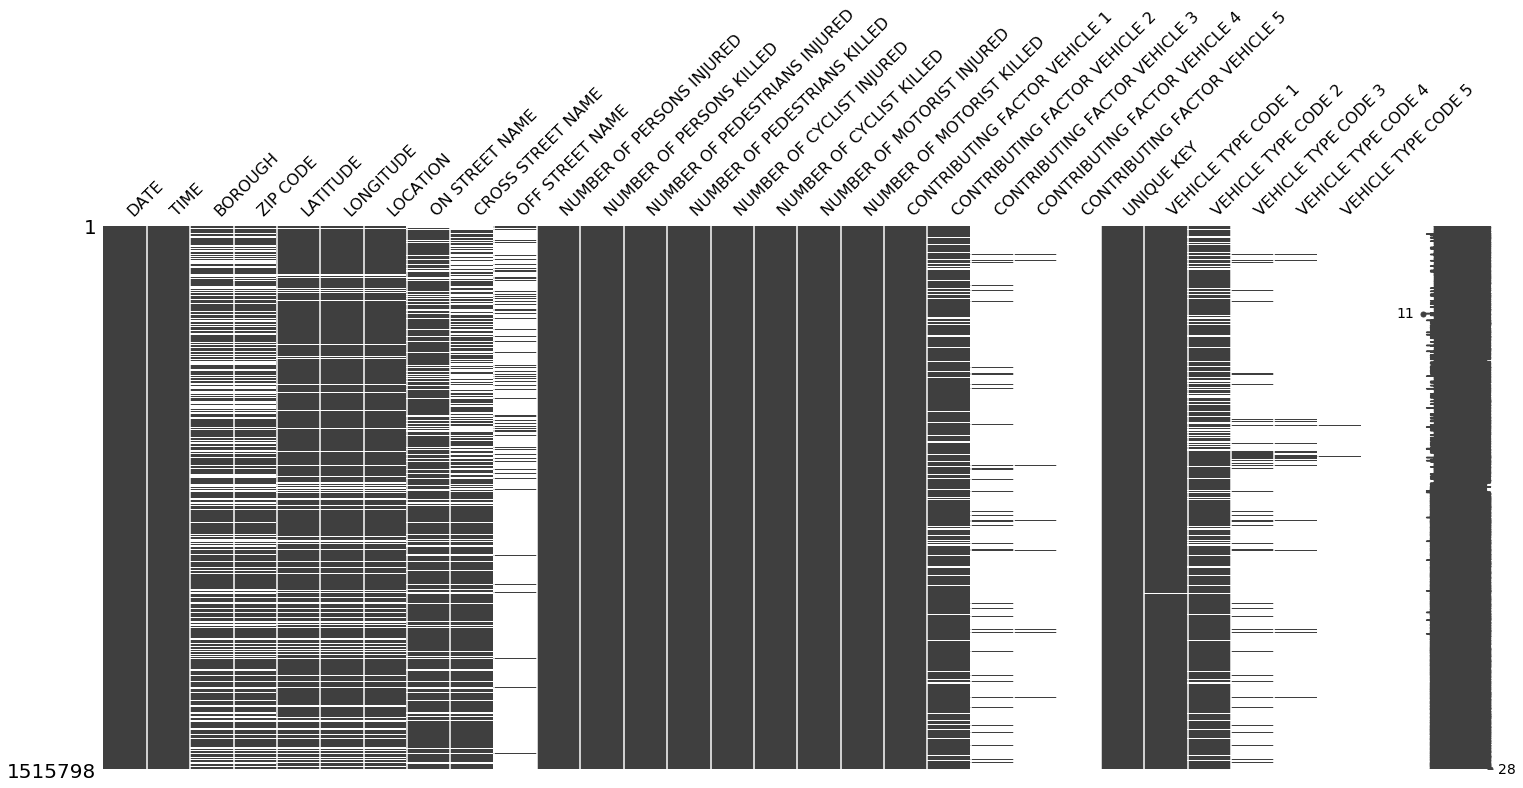

In [5]:
# Visualizing missing data from dataset
msno.matrix(raw_data)

We can see that date, time, injuries/deaths, and the contributing factor of the first vehicle columns are completely populated. Geographic information are spotty, with coordinates being the most populated column.

Certain columns, such as vehicle type codes 3-5, contributing factor for vehicles 3-5 are almost completely unpopulated, as is the cross street. These columns are possibly used for multi-vehicle collisions, which are relatively rare. These columns will be discarded for analysis.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

***Note***
Missing values are not always denoted by NaN.
For example:
- Coordinates include 0 values and at least one incorrect entry (-201.3600)
- Contributing factor include 'Unspecified' values

  
  *These values will be replaced by NaN for analysis

---

### For analysis, we're interested in the following columns 
- Date
- Time
- Borough
- Zip Code
- Latitude/Longitude/Location
- On/Cross Street Name
- Injuries/Deaths
- Contributing Factors and Vehicle Types
- Unique Key

**Let's take a closer look at these columns to determine whether we need any cleanup:**

**1. Date**

In [6]:
# To facilitate working with dates, they will be converted to datetime
raw_data['DATE'] = pd.to_datetime(raw_data['DATE'])

In [7]:
raw_data[['DATE']].head()

,DATE
0,2019-06-14
1,2019-06-14
2,2019-06-14
3,2019-06-14
4,2019-06-14


In [8]:
min_date = raw_data['DATE'].min()
max_date = raw_data['DATE'].max()
print(f'The dataset covers the period between {min_date} and {max_date}')
missind_date = raw_data['DATE'].isna().sum()
print(f'There are {missind_date} missing dates')

The dataset covers the period between 2012-07-01 00:00:00 and 2019-06-14 00:00:00
There are 0 missing dates


**2. Time**

In [9]:
min_time = raw_data['TIME'].min()
max_time = raw_data['TIME'].max()
print(f'The dataset covers the hours between {min_date} and {max_date}')
missind_time = raw_data['TIME'].isna().sum()
print(f'There are {missind_time} missing times')

The dataset covers the hours between 2012-07-01 00:00:00 and 2019-06-14 00:00:00
There are 0 missing times


In [10]:
raw_data[['TIME']].head()

,TIME
0,0:00
1,0:00
2,0:00
3,0:00
4,0:00


**3. Borough**

In [11]:
# Confirming accuracy of Borough data 
raw_data['BOROUGH'].unique()

array(['BRONX', 'BROOKLYN', 'QUEENS', nan, 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

**4. Latitude/Longitude/Location**

In [12]:
print(raw_data[['LATITUDE', 'LONGITUDE', 'LOCATION']].max())
print('\n')
print(raw_data[['LATITUDE', 'LONGITUDE', 'LOCATION']].min())

LATITUDE     43.344444
LONGITUDE     0.000000
dtype: float64


LATITUDE       0.00000
LONGITUDE   -201.35999
dtype: float64


In [13]:
raw_data[['LATITUDE', 'LONGITUDE', 'LOCATION']].sort_values('LATITUDE').head()

,LATITUDE,LONGITUDE,LOCATION
612588,0.0,0.0,"(0.0, 0.0)"
695781,0.0,0.0,"(0.0, 0.0)"
671354,0.0,0.0,"(0.0, 0.0)"
612452,0.0,0.0,"(0.0, 0.0)"
612484,0.0,0.0,"(0.0, 0.0)"


In [14]:
# Converting 0.0 values to NaN
raw_data['LOCATION'].replace('(0.0, 0.0)', np.nan, inplace=True)
raw_data['LATITUDE'].replace(0.0, np.nan, inplace=True)
raw_data['LONGITUDE'].replace(0.0, np.nan, inplace=True)

In [15]:
raw_data[['LATITUDE', 'LONGITUDE', 'LOCATION']].sort_values('LATITUDE').head()

,LATITUDE,LONGITUDE,LOCATION
703101,30.784180,-89.135270,"(30.78418, -89.13527)"
718969,34.783634,-86.768470,"(34.783634, -86.76847)"
1135872,40.498949,-74.244365,"(40.4989488, -74.2443651)"
1446398,40.498949,-74.244365,"(40.4989488, -74.2443651)"
763122,40.499135,-74.243485,"(40.4991346, -74.2434848)"


After sorting, two locations corresponding to entries at indices 703101 and 718969 are incorrect, as their locations map to 30-98 E Off Ramp, Perkinston, MS 39573  in 30-98 E Off Ramp, Perkinston, MS 39573 and 106-112 Merge Ave, Harvest, AL 35749, respectively.

In [16]:
print(raw_data.iloc[703101])
print('\n')
print(raw_data.iloc[718969])

DATE                                          2016-05-21 00:00:00
TIME                                                        18:53
BOROUGH                                                       NaN
ZIP CODE                                                      NaN
LATITUDE                                                  30.7842
LONGITUDE                                                -89.1353
LOCATION                                    (30.78418, -89.13527)
ON STREET NAME                   E Off Ramp                      
CROSS STREET NAME                                             NaN
OFF STREET NAME                                               NaN
NUMBER OF PERSONS INJURED                                       0
NUMBER OF PERSONS KILLED                                        0
NUMBER OF PEDESTRIANS INJURED                                   0
NUMBER OF PEDESTRIANS KILLED                                    0
NUMBER OF CYCLIST INJURED                                       0
NUMBER OF 

Since street names are missing, we cannot confidently locate these incidents.
We'll replace their location data with NaN

In [17]:
raw_data['LATITUDE'].iloc[703101] = np.nan
raw_data['LONGITUDE'].iloc[703101] = np.nan
raw_data['LOCATION'].iloc[703101] = np.nan

raw_data['LATITUDE'].iloc[718969] = np.nan
raw_data['LONGITUDE'].iloc[718969] = np.nan
raw_data['LOCATION'].iloc[718969] = np.nan

/Users/rogerlefort/anaconda3/envs/NYPD_Motor_Vehicle_Collisions/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
print(raw_data.iloc[703101])
print('\n')
print(raw_data.iloc[718969])

DATE                                          2016-05-21 00:00:00
TIME                                                        18:53
BOROUGH                                                       NaN
ZIP CODE                                                      NaN
LATITUDE                                                      NaN
LONGITUDE                                                     NaN
LOCATION                                                      NaN
ON STREET NAME                   E Off Ramp                      
CROSS STREET NAME                                             NaN
OFF STREET NAME                                               NaN
NUMBER OF PERSONS INJURED                                       0
NUMBER OF PERSONS KILLED                                        0
NUMBER OF PEDESTRIANS INJURED                                   0
NUMBER OF PEDESTRIANS KILLED                                    0
NUMBER OF CYCLIST INJURED                                       0
NUMBER OF 

In [19]:
raw_data[['LATITUDE', 'LONGITUDE', 'LOCATION']].sort_values('LATITUDE').head()

,LATITUDE,LONGITUDE,LOCATION
1135872,40.498949,-74.244365,"(40.4989488, -74.2443651)"
1446398,40.498949,-74.244365,"(40.4989488, -74.2443651)"
763122,40.499135,-74.243485,"(40.4991346, -74.2434848)"
352616,40.499310,-74.242630,"(40.49931, -74.24263)"
954188,40.499479,-74.241728,"(40.4994787, -74.2417278)"


**5. On/Cross Street Name**

In [20]:
raw_data[['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']].isna().sum()

ON STREET NAME        292703
CROSS STREET NAME     491334
OFF STREET NAME      1315250
dtype: int64

As we've confirmed, the Off Street column in mostly unpopulated. We'll drop it for analysis

In [21]:
raw_data.drop(['OFF STREET NAME'], axis=1, inplace=True)

In [22]:
# Confirming dropping of column
raw_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-06-14,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,4152765,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,2019-06-14,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-06-14,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,4151711,Sedan,NaN,NaN,NaN,NaN
3,2019-06-14,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,0.0,...,Unspecified,NaN,NaN,NaN,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-06-14,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4151943,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**6. Injuries/Deaths**

In [23]:
raw_data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0.0,0.0,0,0,0,0,0,0
1,0.0,0.0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,0,0,0
3,0.0,0.0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,0,0,0


In [24]:
raw_data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

NUMBER OF PERSONS INJURED        394313.0
NUMBER OF PERSONS KILLED           1763.0
NUMBER OF PEDESTRIANS INJURED     77078.0
NUMBER OF PEDESTRIANS KILLED        958.0
NUMBER OF CYCLIST INJURED         30973.0
NUMBER OF CYCLIST KILLED            120.0
NUMBER OF MOTORIST INJURED       286498.0
NUMBER OF MOTORIST KILLED           689.0
dtype: float64

In [25]:
# Verifying that all rows are populated
raw_data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].isna().sum()

NUMBER OF PERSONS INJURED        17
NUMBER OF PERSONS KILLED         31
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
dtype: int64

Two colums have NaN values. To facilitate analysis, we'll assume no injuries/deaths were reported an assign these values to 0

In [26]:
raw_data['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)

In [27]:
raw_data['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)

In [28]:
# Confirming replacement of NaN with 0
raw_data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].isna().sum()

NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

**7. Contributing Factor Vehicles**

In [29]:
raw_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5']].head()

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,Turning Improperly,Unspecified,NaN,NaN,NaN,4152765,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,Lane Marking Improper/Inadequate,Unspecified,NaN,NaN,NaN,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,Unspecified,NaN,NaN,NaN,NaN,4151711,Sedan,NaN,NaN,NaN,NaN
3,Unspecified,Unspecified,NaN,NaN,NaN,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4151943,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [30]:
raw_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5']].isna().sum()

CONTRIBUTING FACTOR VEHICLE 1       3952
CONTRIBUTING FACTOR VEHICLE 2     202139
CONTRIBUTING FACTOR VEHICLE 3    1418108
CONTRIBUTING FACTOR VEHICLE 4    1495490
CONTRIBUTING FACTOR VEHICLE 5    1510629
VEHICLE TYPE CODE 1                 4854
VEHICLE TYPE CODE 2               246264
VEHICLE TYPE CODE 3              1388722
VEHICLE TYPE CODE 4              1467645
VEHICLE TYPE CODE 5              1505515
dtype: int64

For analysis, we'll only keep columns that are mostly populated

In [31]:
raw_data.drop(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

In [32]:
raw_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2019-06-14,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,0.0,...,0,0,0,0,0,Turning Improperly,Unspecified,4152765,Station Wagon/Sport Utility Vehicle,Sedan
1,2019-06-14,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,0.0,...,0,0,0,0,0,Lane Marking Improper/Inadequate,Unspecified,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle
2,2019-06-14,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4151711,Sedan,NaN
3,2019-06-14,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2019-06-14,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,0.0,...,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,4151943,Station Wagon/Sport Utility Vehicle,Sedan


We'll also replace Unspecified values with NaN

In [33]:
raw_data['CONTRIBUTING FACTOR VEHICLE 1'].replace('Unspecified', np.nan, inplace=True)
raw_data['CONTRIBUTING FACTOR VEHICLE 2'].replace('Unspecified', np.nan, inplace=True)

raw_data['VEHICLE TYPE CODE 1'].replace('Unspecified', np.nan, inplace=True)
raw_data['VEHICLE TYPE CODE 2'].replace('Unspecified', np.nan, inplace=True)

In [34]:
raw_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2019-06-14,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,0.0,...,0,0,0,0,0,Turning Improperly,NaN,4152765,Station Wagon/Sport Utility Vehicle,Sedan
1,2019-06-14,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,0.0,...,0,0,0,0,0,Lane Marking Improper/Inadequate,NaN,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle
2,2019-06-14,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,0.0,...,0,0,0,0,0,NaN,NaN,4151711,Sedan,NaN
3,2019-06-14,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,0.0,...,0,0,0,0,0,NaN,NaN,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2019-06-14,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,0.0,...,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,4151943,Station Wagon/Sport Utility Vehicle,Sedan


In [35]:
raw_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2019-06-14,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,0.0,...,0,0,0,0,0,Turning Improperly,NaN,4152765,Station Wagon/Sport Utility Vehicle,Sedan
1,2019-06-14,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,0.0,...,0,0,0,0,0,Lane Marking Improper/Inadequate,NaN,4152260,Pick-up Truck,Station Wagon/Sport Utility Vehicle
2,2019-06-14,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,0.0,...,0,0,0,0,0,NaN,NaN,4151711,Sedan,NaN
3,2019-06-14,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,0.0,...,0,0,0,0,0,NaN,NaN,4151632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,2019-06-14,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,0.0,...,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,4151943,Station Wagon/Sport Utility Vehicle,Sedan


In [36]:
raw_data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'],
      dtype='object')

In [37]:
column_order = ['UNIQUE KEY',
                'DATE', 'TIME', 
                'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 
                'ON STREET NAME', 'CROSS STREET NAME',
                'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
                'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

In [38]:
cleaned_collision_data = raw_data[column_order]

In [39]:
cleaned_collision_data.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,4152765,2019-06-14,0:00,BRONX,10461,40.836327,-73.827614,"(40.836327, -73.827614)",CROSBY AVENUE,BAISLEY AVENUE,...,0,0,0,0,0,0,Turning Improperly,NaN,Station Wagon/Sport Utility Vehicle,Sedan
1,4152260,2019-06-14,0:00,BROOKLYN,11207,40.685127,-73.906430,"(40.685127, -73.90643)",PILLING STREET,EVERGREEN AVENUE,...,0,0,0,0,0,0,Lane Marking Improper/Inadequate,NaN,Pick-up Truck,Station Wagon/Sport Utility Vehicle
2,4151711,2019-06-14,0:00,BROOKLYN,11212,40.661655,-73.927950,"(40.661655, -73.92795)",NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,Sedan,NaN
3,4151632,2019-06-14,0:00,QUEENS,11413,40.675213,-73.737800,"(40.675213, -73.7378)",MERRICK BOULEVARD,232 STREET,...,0,0,0,0,0,0,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4,4151943,2019-06-14,0:00,NaN,NaN,40.887420,-73.894490,"(40.88742, -73.89449)",MAJOR DEEGAN EXPRESSWAY,NaN,...,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,Station Wagon/Sport Utility Vehicle,Sedan


In [40]:
cleaned_collision_data.to_csv('Resources/Cleaned_NYPD_Motor_Vehicle_Collisions.csv', index=False)